In [1]:
from keyname import keyname as kn
import matplotlib.pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import ptitprince as pt
import seaborn as sns
from teeplot import teeplot


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: 34327cac3d14
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 2
nbname: reconstruction-quality-plots
nbpath: /opt/hstrat-evolutionary-inference/binder/reconstruction-quality-plots.ipynb
revision: null
session: 7a2eb841-3650-4148-ae8a-4b84bdce7a8e
timestamp: 2023-03-14T01:35:12Z00:00


IPython==7.16.1
keyname==0.5.2
yaml==6.0
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
seaborn==0.11.0
teeplot==0.5.0
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.0.3
json==2.0.9
six==1.16.0
ipykernel==5.5.3


In [3]:
df = pd.read_csv("https://osf.io/ck47r/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


6f7ca67df987a1b8


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,subsampling-fraction,tournament_size,treatment,trie-postprocess,_generation,_index,ext,_,triplet_distance,quartet_distance
0,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,29,...,0.01,2,20,naive,32768,832,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.098844e-14,-2.098824e-14
1,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,6,...,0.01,2,20,naive,32768,188,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.111658e-14,-2.111638e-14
2,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,34,...,1.00,2,20,rollback,32768,972,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.088371e-14,-2.088351e-14
3,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,17,...,1.00,2,20,expected,32768,496,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1.428246e-03,5.220629e-03
4,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,49,...,0.01,2,20,rollback,32768,1392,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.100494e-14,-2.100474e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100795,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,44,...,1.00,2,25,naive,262144,1257,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6.865545e-04,2.452341e-03
100796,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,47,...,1.00,2,25,rollback,262144,1341,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.097384e-14,-2.097364e-14
100797,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,19,...,0.01,2,25,expected,262144,557,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.106571e-14,-2.106551e-14
100798,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,6,...,1.00,2,25,rollback,262144,193,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,5.161053e-04,1.816271e-03


In [4]:
methodological_variables = [
#  'resolution',
 'subsampling-fraction',
 'trie-postprocess',  # pick one based on bias/accuracy
]

evolutionary_variables = [
 'mut_distn',  # sensitivity analysis
 'num_generations',  # sensitivity analysis
 'num_islands',
 'num_niches',
 'p_island_migration',  # sensitivity analysis
 'p_niche_invasion',  # sensitivity analysis
 'population_size',  # doesn't change
 'tournament_size',
]


In [5]:
df = df[
    (df['subsampling-fraction'] == 1.0) &
    (df['trie-postprocess'] == 'naive')
]


teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


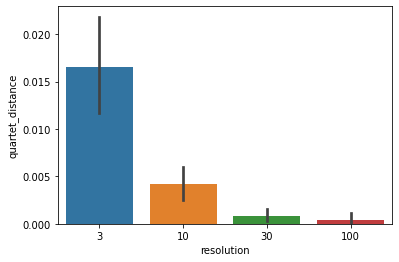

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


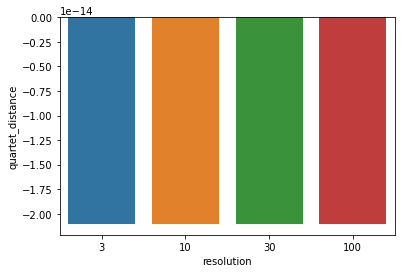

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


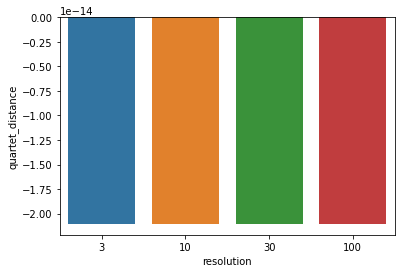

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


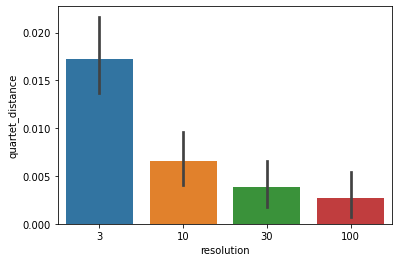

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


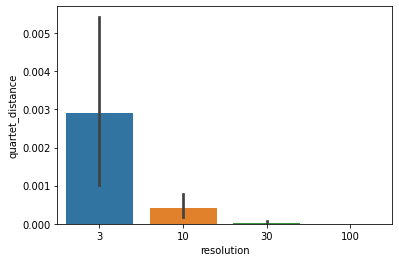

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


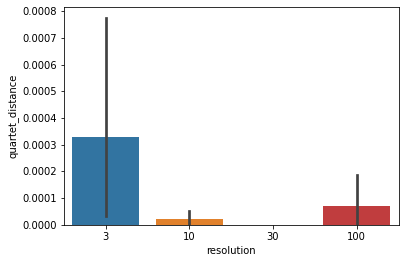

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


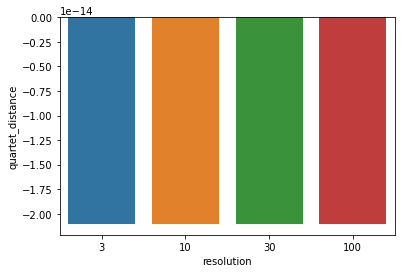

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


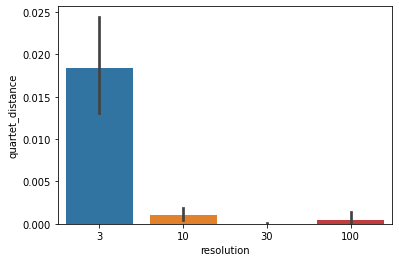

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


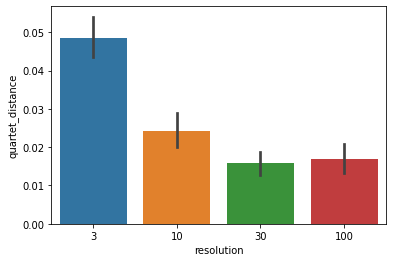

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


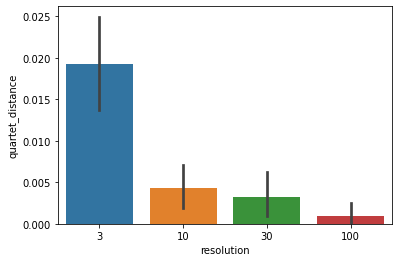

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


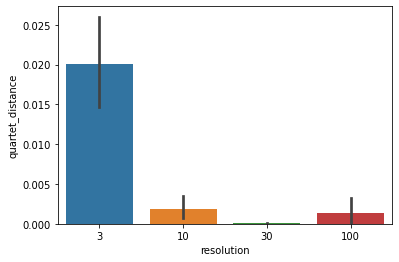

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


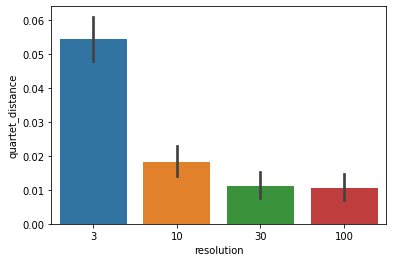

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


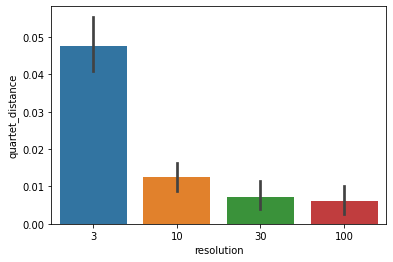

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


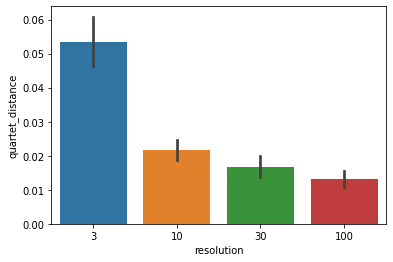

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


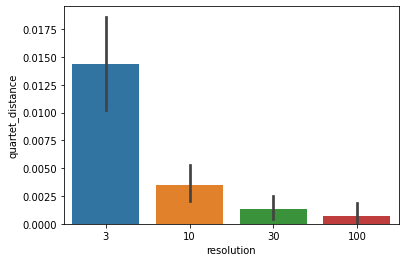

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


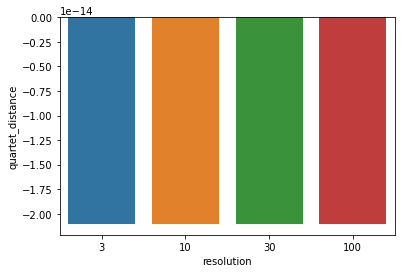

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


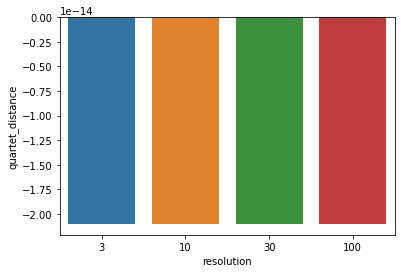

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


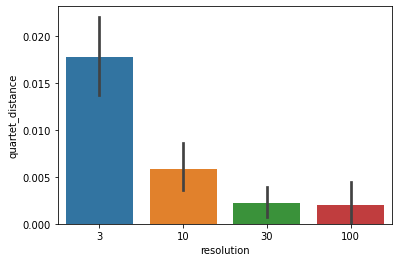

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


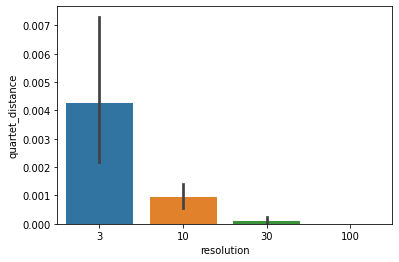

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


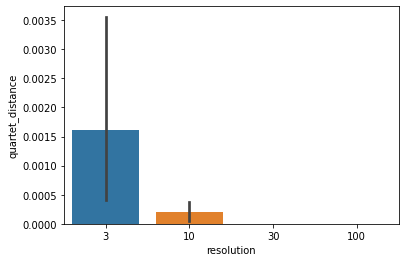

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


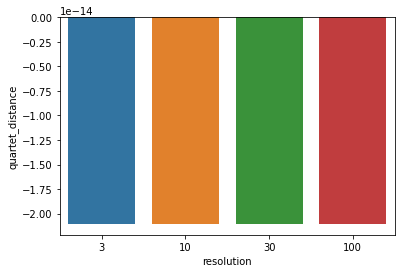

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


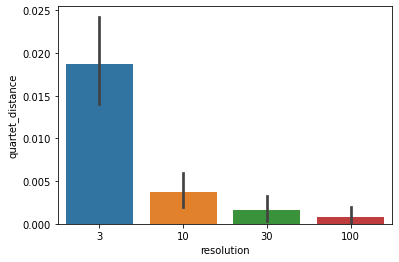

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=1+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


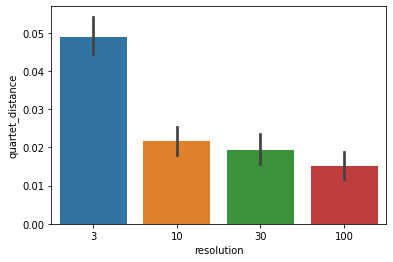

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


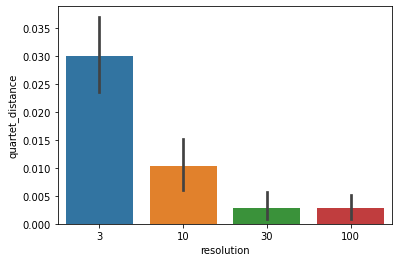

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=4+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


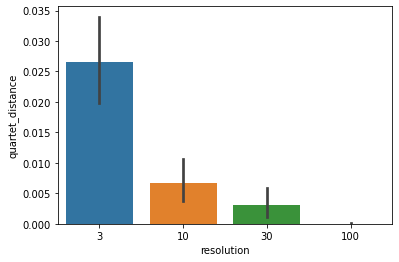

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


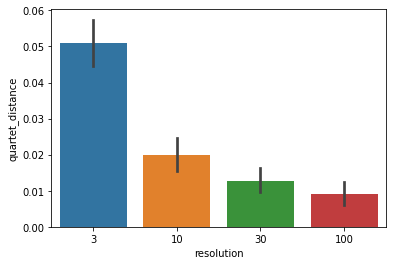

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


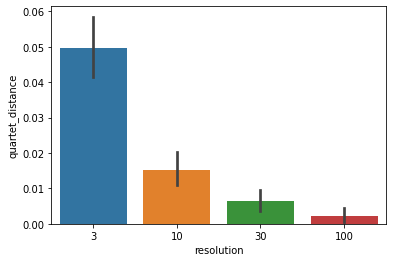

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=barplot+x=resolution+y=quartet-distance+ext=.png


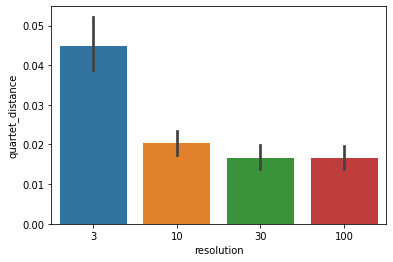

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


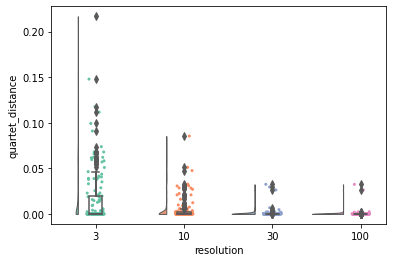

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


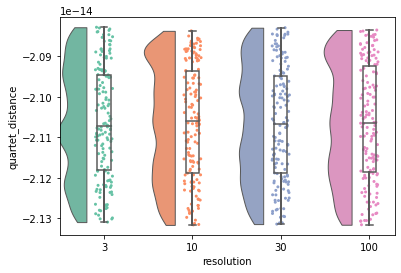

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


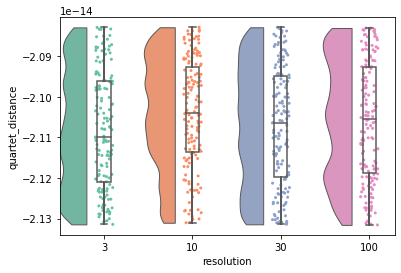

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


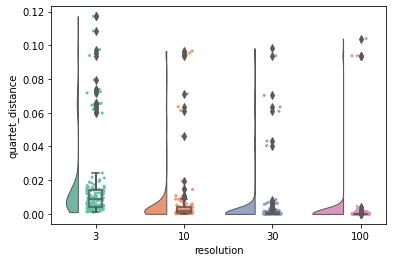

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


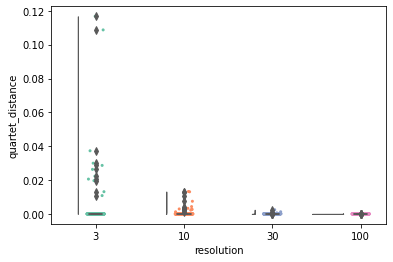

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


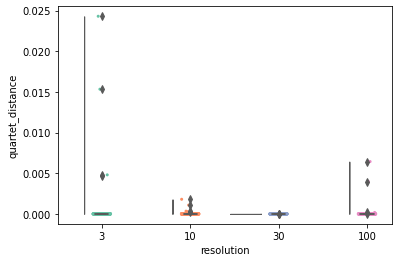

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


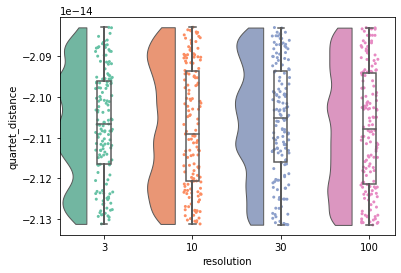

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_siz.../e=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


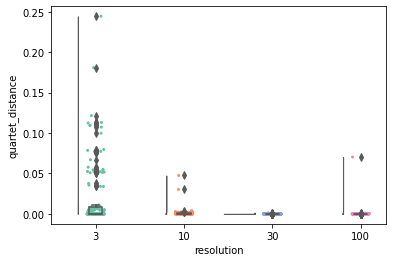

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


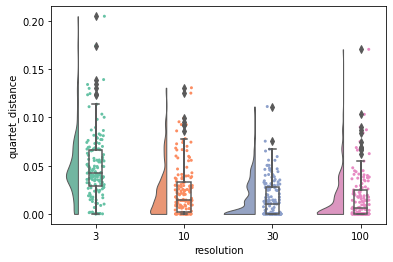

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


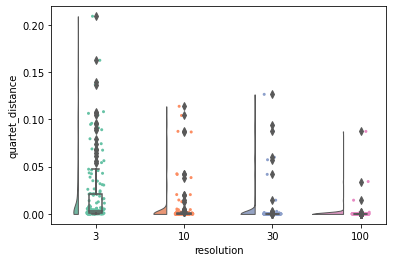

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


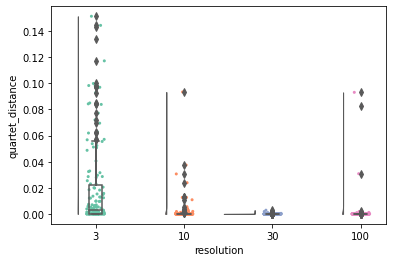

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


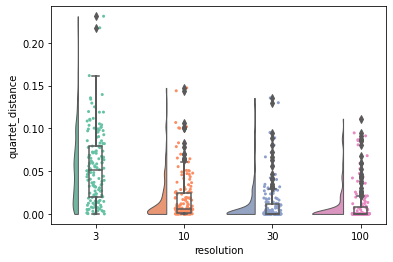

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


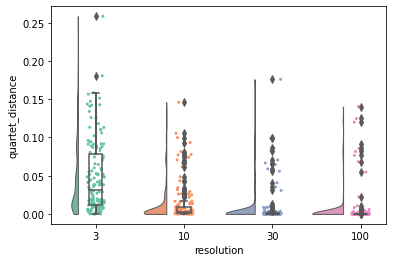

teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.exponential+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament_.../size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


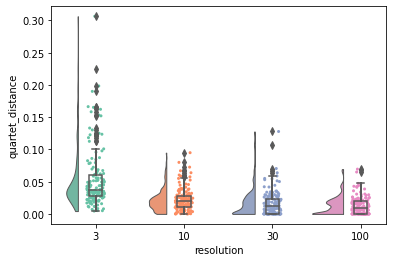

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


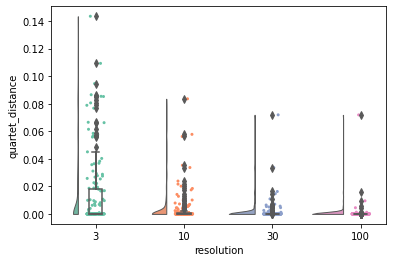

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


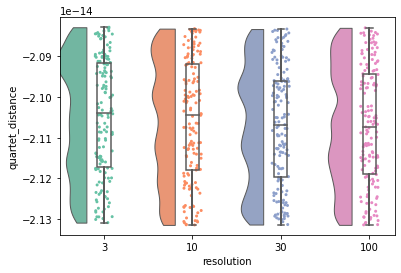

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


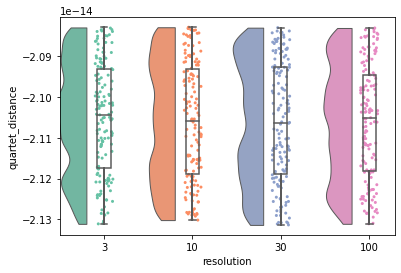

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


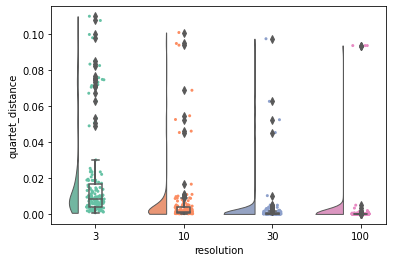

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


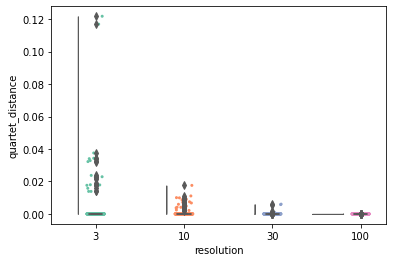

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


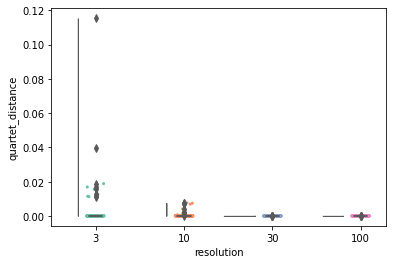

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


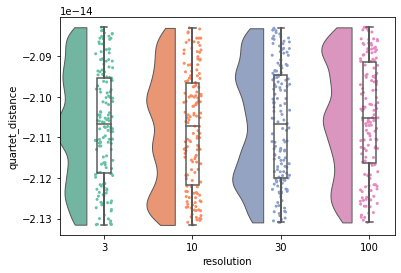

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournament.../_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


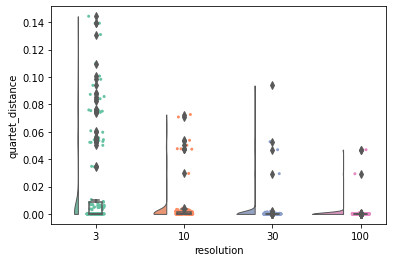

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=1+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


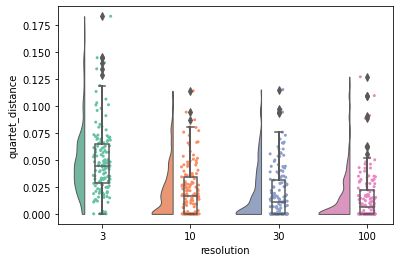

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


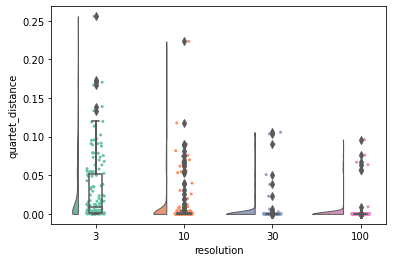

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=1+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=4+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


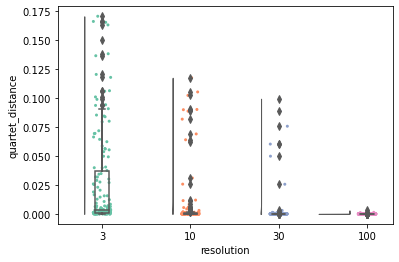

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


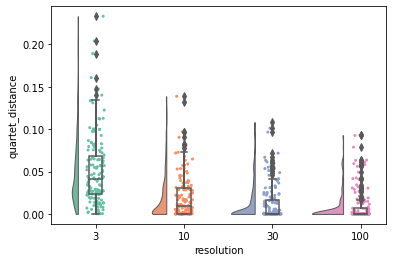

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=4+p_island_migration=0.01+p_niche_invasion=3.0517578125e-06+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


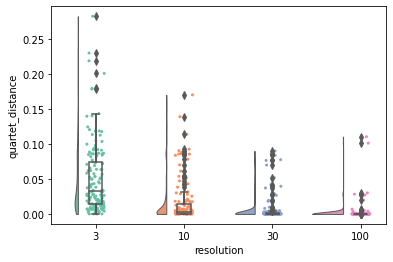

teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./mut_distn=np.random.standard_normal+num_generations=32768+num_islands=1024+num_niches=8+p_island_migration=0.01+p_niche_invasion=3.0517578125e-08+population_size=32768+subsampling-fraction=1.0+tournam.../ent_size=2+trie-postprocess=naive+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


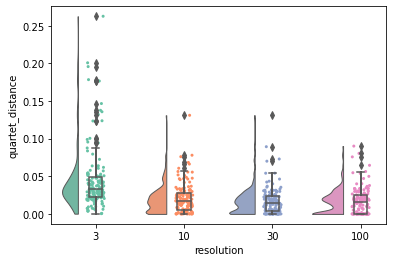

In [6]:
for viz in sns.barplot, pt.RainCloud:
    for group, group_df in df.groupby(methodological_variables + evolutionary_variables):
        teeplot.tee(
            viz,
            data=group_df,
            x='resolution',
            y='quartet_distance',
            teeplot_outattrs={
                a: b for a, b in zip(methodological_variables + evolutionary_variables, group)
            }
        )
        plt.show()
